# Precision, Recall

Please consult the Basic Course lectures and examples for a presentation of the k-NN classifier.

Here we will:

1. load heart disease data
2. perform k-nn classification
3. examine the different metrics related to precision and recall

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(seed=123)

data_file_path = 'heart.csv'
data_df = pd.read_csv(data_file_path)

#To get information of dataset and the datatypes of the features
print(data_df.head())
print(data_df.dtypes)

print(data_df.sex.value_counts())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
1    713
0    312
Name: sex, dtype: int64


Check for missing values

In [10]:
data_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

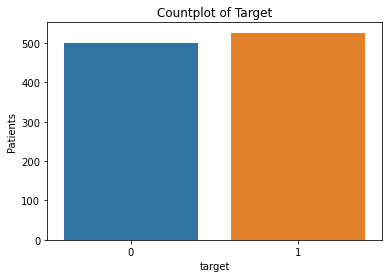

In [28]:
# distribution of target variable.
sns.countplot(x=data_df["target"])

# Add labels
plt.title('Countplot of Target')
plt.xlabel('target')
plt.ylabel('Patients')
plt.show()

Split into train and test, and scale data for k-nn

In [2]:
y = data_df["target"].values
x = data_df.drop(["target"], axis = 1)

#Scaling - mandatory for knn
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) # 70% training and 30% test

To find the best value of k, loop and evaluate the test-score.

In [3]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

Best test score:- 0.9675324675324676 at k = 1


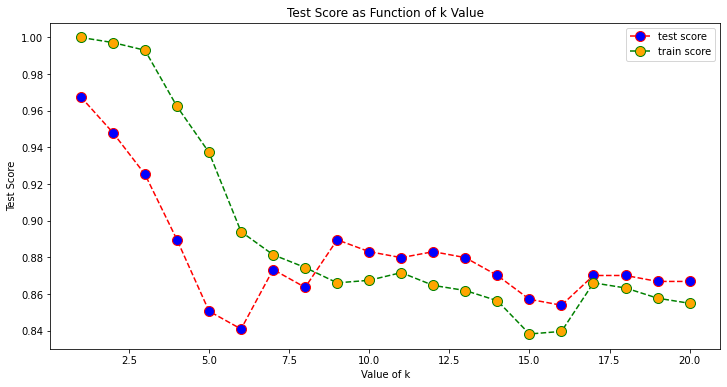

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), test_score, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)#,
plt.plot(range(1, 21), train_score, color='green', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=10)
plt.title('Test Score as Function of k Value')
plt.xlabel('Value of k')
plt.ylabel('Test Score')
plt.legend(['test score','train score'])
print("Best test score:",max(test_score),"at k =",test_score.index(max(test_score))+1)

Using the value found, fit the model.

In [18]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(1)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9707792207792207

To see how good the model is, compute the confusion matrix.

In [19]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,141,3,144
1,6,158,164
All,147,161,308


## Analysis

Actual (true) values are
- 144 without heart disease
- 164 with heart disease

Predicted values are
- 147 without heart disease, i.e. 3 more than the actual
- 161 with heart disease,  i.e. 3 less than the actual

We conclude the folllowing:

1. True negatives are 141 (having no heart disease and correctly predicted)
2. True positives are 158 (having a heart disease and correctly predicted)
3. False positives are 3 (NOT having heart disease, but incorrectly predicted as having)
4. False negatives are 6 (having heart disease, but incorrectly predicted as NOT having)


## Complete Classification Report

We want more details on the precision and recall.

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       144
           1       0.98      0.96      0.97       164

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



## Accuracy, Precision, Recall and F1-Score

The classification report details all these quantities.

**Precison** is is the ratio between the True Positives and all the Positives - a measure of patients that we correctly identify as having a heart disease out of all the patients actually having it.

**Recall** is the measure of our model correctly identifying True Positives. AKA sensitiviy, or true positive rate (TPR)

**Accuracy** is the ratio between the total number of correct predictions and the total number of predictions. Using accuracy as a defining metric makes sense intuitively, but more often than not it is advisable to use Precision and Recall too. There might be situations where our accuracy is very high, but our precision or recall is low. These two are often more critical in the evaluation and reliability of a ML or surrogate model. 

- We do not want to miss any sick people.
- We do not want to unnecessarily treat healthy people.

### Conclusion

Understanding Accuracy helps to realize that we need a _tradeoff_ between Precision and Recall. We first need to decide which is more important for our classification problem. For example, for our dataset, we can consider that achieving a high recall is more important than getting a high precision – we would like to detect as many heart patients as possible. For other models, such as classifying whether or not a bank customer is a loan defaulter, it is desirable to have high precision since the bank would not want to lose customers who were denied a loan based on the model’s prediction that they would be defaulters.

There are also many situations where precision and recall are _equally_ important. For example, for our heart model, if the doctor informs us that the patients who were incorrectly classified as suffering from heart disease are equally important since they could be indicative of some other ailment, then we would aim for not only a high recall but a high precision as well.

In such cases, we can use the F1-score, which is the harmonic mean of the Precision and Recall:




## ROC

We can also visualize Precision and Recall using 
- ROC curves (Receiver Operating Characteristic)
- PRC curves (Precision Recall)

The ROC is the plot between the TPR (y-axis) and FPR (x-axis). Since our model classifies the patient as having heart disease or not based on the probabilities generated for each class, we can decide the threshold of the probabilities as well.

For example, we want to set a threshold value of $0.4.$ This means that the model will classify the data point/patient as having heart disease if the probability of the patient having a heart disease is greater than $0.4.$ This will obviously give a high recall value and reduce the number of False Positives. Similarly, using the ROC curve, we can visualize how our model performs for different threshold values.



0.971290650406504

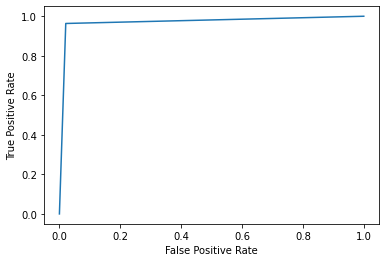

In [26]:
from sklearn.metrics import RocCurveDisplay, roc_curve

y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
roc_auc_score(y_test, y_pred_proba)

## Precision-Recall Curve

This curve directly represents the precision (y-axis) and the recall (x-axis). If you observe our definitions and formulas for the Precision and Recall above, you will notice that we are not using the True Negatives (the actual number of people who do not have heart disease).

This is particularly useful for situations where we have an _imbalanced_ dataset and the number of negatives is much larger than the positives(or when the number of patients having no heart disease is much larger than the patients having it). In such cases, our greater concern would be detecting the patients with heart disease as correctly as possible and would not need the TNR.

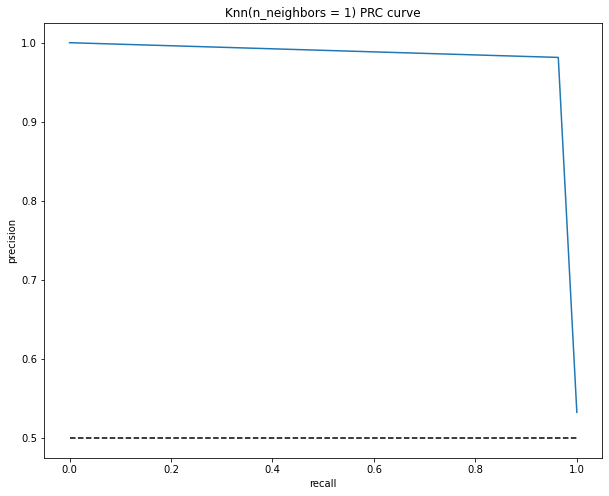

In [23]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'Knn')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Knn(n_neighbors = 1) PRC curve')
plt.show()

## Analysis



In [24]:
# calculate precision-recall AUC
auc_prc = auc(recall, precision)
print(auc_prc)

0.982130806627095


## Conclusion

- Precision and recall are two evaluation metrics used to measure the performance of a classifier in binary and multiclass classification problems.
- Precision measures the accuracy of positive predictions, while recall measures the completeness of positive predictions.
- High precision and high recall are desirable, but there may be a trade-off between the two metrics in some cases.
- Precision and recall should be used together with other evaluation metrics, such as accuracy and F1-score, to get a comprehensive understanding of the performance of a classifier.